In [66]:
# AI Cryptocurrency Time Series Forecasting Analysis: The Graph, Fetch AI, & Ocean Protocol

In [75]:
# Import Seaborn, Pandas, Matplotlib, Prophet and HvPlot
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from pathlib import Path
import hvplot.pandas

In [76]:
# Load the data into a pandas dataframe
df_grt = pd.read_csv("GRT.csv", usecols=['Date', 'Close']).rename(columns={"Close": "y", "Date": "ds"}).astype({"y": "float"})
df_grt["ds"] = pd.to_datetime(df_grt["ds"])

df_fet = pd.read_csv("FET.csv", usecols=['Date', 'Close']).rename(columns={"Close": "y", "Date": "ds"}).astype({"y": "float"})
df_fet["ds"] = pd.to_datetime(df_fet["ds"])

df_ocean = pd.read_csv("OCEAN.csv", usecols=['Date', 'Close']).rename(columns={"Close": "y", "Date": "ds"}).astype({"y": "float"})
df_ocean["ds"] = pd.to_datetime(df_ocean["ds"])

# Concatenate the dataframes together
df = pd.concat([df_grt, df_fet, df_ocean])

print(df)

            ds         y
0   2022-02-17  0.436112
1   2022-02-18  0.413266
2   2022-02-19  0.417159
3   2022-02-20  0.392726
4   2022-02-21  0.357511
..         ...       ...
361 2023-02-13  0.420690
362 2023-02-14  0.473797
363 2023-02-15  0.503367
364 2023-02-16       NaN
365 2023-02-17  0.452811

[1098 rows x 2 columns]


13:29:45 - cmdstanpy - INFO - Chain [1] start processing
13:29:45 - cmdstanpy - INFO - Chain [1] done processing
13:29:45 - cmdstanpy - INFO - Chain [1] start processing
13:29:45 - cmdstanpy - INFO - Chain [1] done processing
13:29:45 - cmdstanpy - INFO - Chain [1] start processing
13:29:45 - cmdstanpy - INFO - Chain [1] done processing


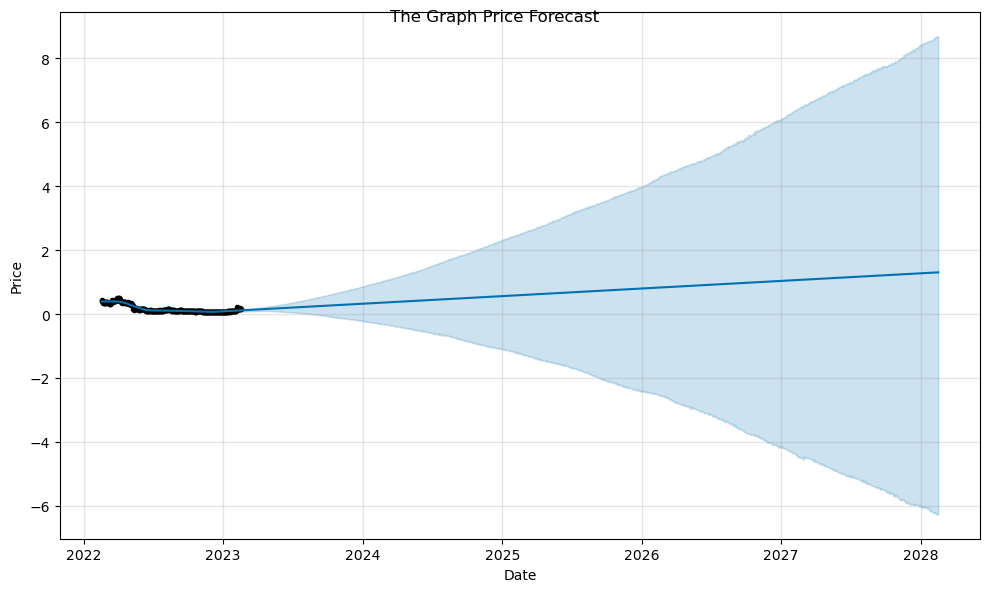

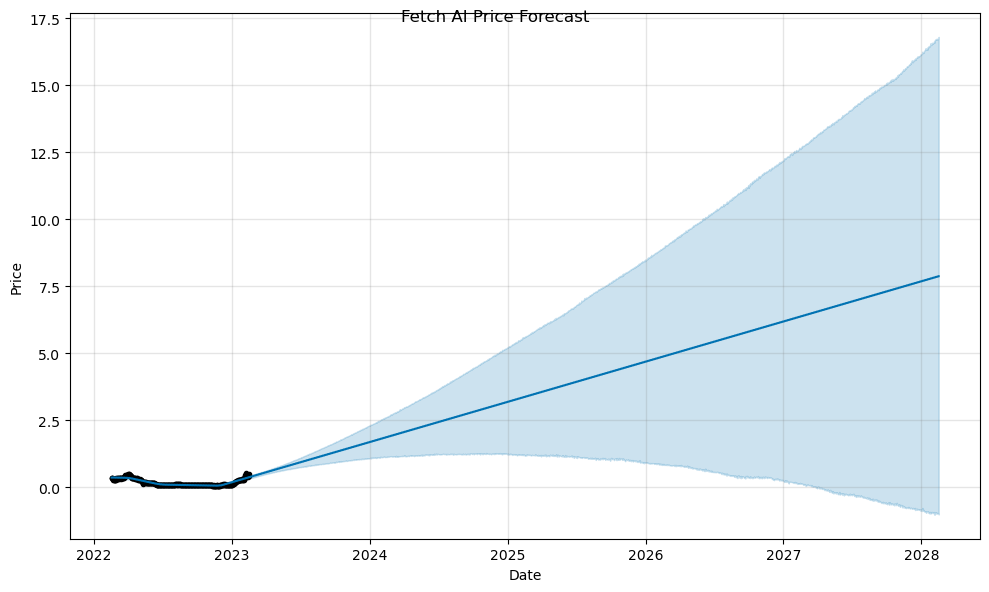

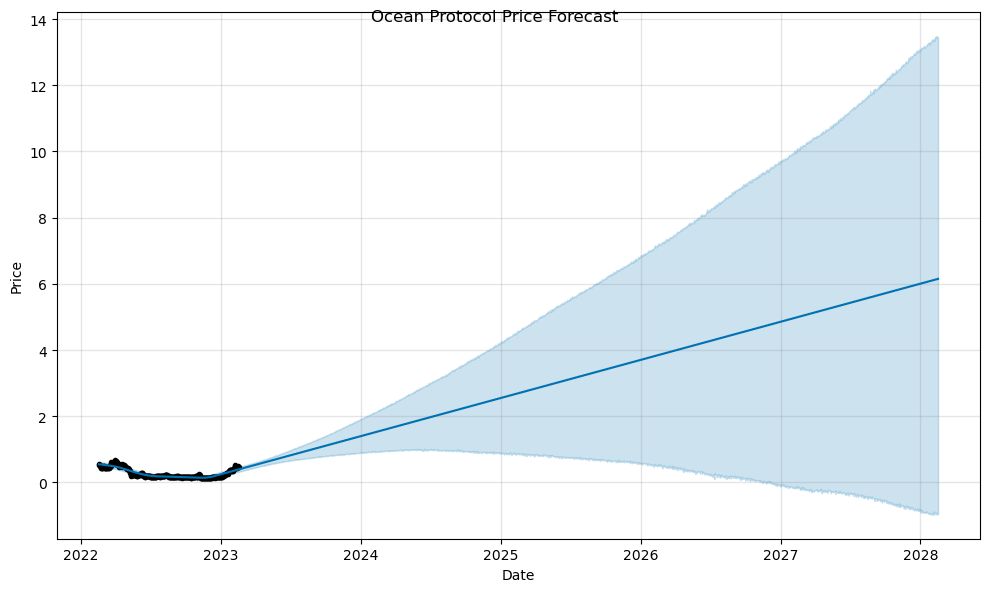

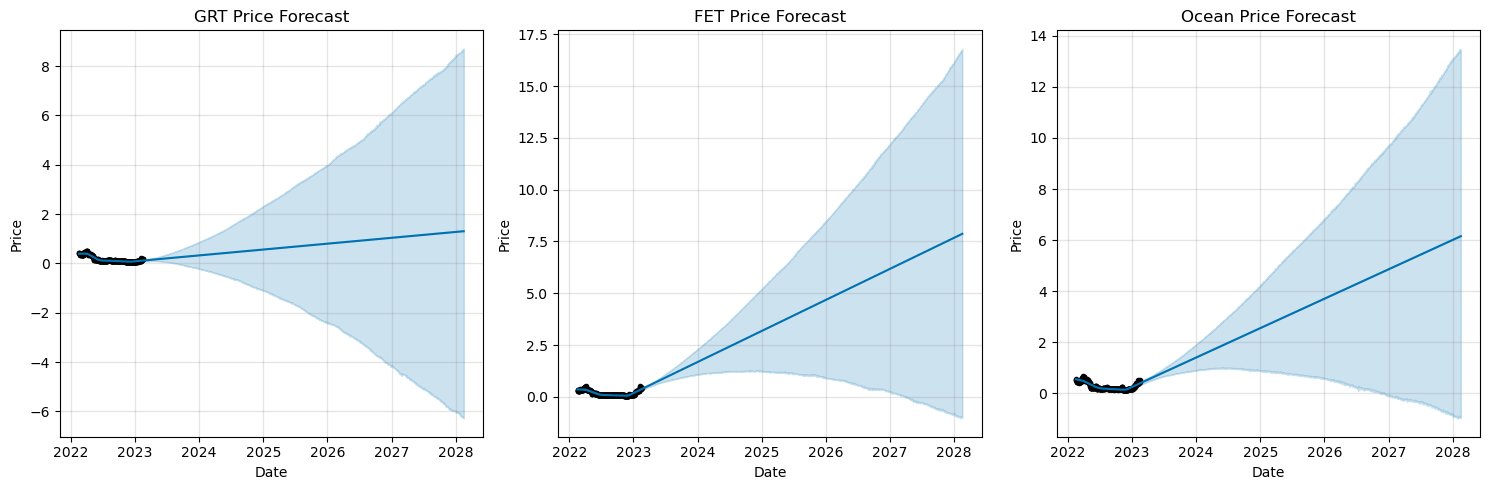

In [70]:
# Initialize the Prophet model and fit it to the data for each cryptocurrency
model_grt = Prophet()
model_grt.fit(df_grt)

model_fet = Prophet()
model_fet.fit(df_fet)

model_ocean = Prophet()
model_ocean.fit(df_ocean)

# Create a future dataframe to hold the predicted prices for each cryptocurrency
future_grt = model_grt.make_future_dataframe(periods=365 * 5, freq="D")
future_fet = model_fet.make_future_dataframe(periods=365 * 5, freq="D")
future_ocean = model_ocean.make_future_dataframe(periods=365 * 5, freq="D")

# Make predictions for each cryptocurrency using the Prophet model
forecast_grt = model_grt.predict(future_grt)
forecast_fet = model_fet.predict(future_fet)
forecast_ocean = model_ocean.predict(future_ocean)

# Plot the predicted prices for each cryptocurrency
fig_grt = model_grt.plot(forecast_grt, xlabel="Date", ylabel="Price")
fig_grt.suptitle("The Graph Price Forecast")

fig_fet = model_fet.plot(forecast_fet, xlabel="Date", ylabel="Price")
fig_fet.suptitle("Fetch AI Price Forecast")

fig_ocean = model_ocean.plot(forecast_ocean, xlabel="Date", ylabel="Price")
fig_ocean.suptitle("Ocean Protocol Price Forecast")

# Create a new figure with three subplots
fig, ax = plt.subplots(ncols=3, figsize=(15, 5))

# Plot the forecast for GRT on the first subplot
model_grt.plot(forecast_grt, ax=ax[0])
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Price")
ax[0].set_title("GRT Price Forecast")

# Plot the forecast for FET on the second subplot
model_fet.plot(forecast_fet, ax=ax[1])
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Price")
ax[1].set_title("FET Price Forecast")

# Plot the forecast for Ocean on the third subplot
model_ocean.plot(forecast_ocean, ax=ax[2])
ax[2].set_xlabel("Date")
ax[2].set_ylabel("Price")
ax[2].set_title("Ocean Price Forecast")

# Display the figure
plt.show()



In [71]:
# Plot the predicted prices for each cryptocurrency using hvplot
hv_grt = forecast_grt.hvplot(x='ds', y='yhat', label='GRT')
hv_fet = forecast_fet.hvplot(x='ds', y='yhat', label='FET')
hv_ocean = forecast_ocean.hvplot(x='ds', y='yhat', label='Ocean')


# Create a new figure with three subplots using hvplot
fig = (forecast_grt.hvplot.line(x='ds', y='yhat', color='blue', ylabel='Price', xlabel='Date') +
       forecast_fet.hvplot.line(x='ds', y='yhat', color='orange', ylabel='Price', xlabel='Date') +
       forecast_ocean.hvplot.line(x='ds', y='yhat', color='green', ylabel='Price', xlabel='Date')).cols(3)

# Display the figure
fig


:Layout
   .Curve.I   :Curve   [ds]   (yhat)
   .Curve.II  :Curve   [ds]   (yhat)
   .Curve.III :Curve   [ds]   (yhat)

<AxesSubplot:xlabel='ds', ylabel='yhat'>

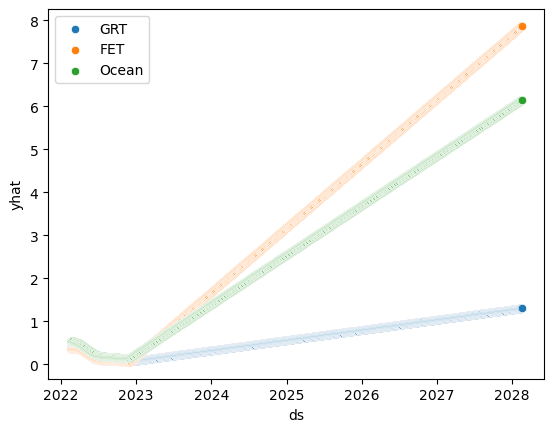

In [72]:
# Create a scatterplot of the predicted prices for each cryptocurrency using Seaborn
sns.scatterplot(data=forecast_grt, x='ds', y='yhat', label='GRT')
sns.scatterplot(data=forecast_fet, x='ds', y='yhat', label='FET')
sns.scatterplot(data=forecast_ocean, x='ds', y='yhat', label='Ocean')